In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB   
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [6]:
train_data    = pd.read_csv('/content/drive/MyDrive/ML_Hw4/TinyMNIST/trainData.csv')
train_labels  = pd.read_csv('/content/drive/MyDrive/ML_Hw4/TinyMNIST/trainLabels.csv')
test_data     = pd.read_csv('/content/drive/MyDrive/ML_Hw4/TinyMNIST/testData.csv')  
test_labels     = pd.read_csv('/content/drive/MyDrive/ML_Hw4/TinyMNIST/testLabels.csv')   

X_train = train_data.values; y_train = train_labels.values
X_test = test_data.values;   y_test  = test_labels.values


In [7]:
def calc_var_perClass(data_per_class):
    mean = np.mean(data_per_class, axis = 0)
    x_bar = data_per_class - mean
    var = np.matmul(x_bar.T, x_bar)
    return var
def calc_inner_Class(data_per_class,mean_data):
    m_bar = np.mean(data_per_class, axis = 0) - mean_data
    inner_class_mat = len(data_per_class)*np.matmul(m_bar, m_bar.T)
    return inner_class_mat
def lda_mat(train_data, train_labels):
  labels = np.unique(train_labels)
  variances = []; Sw = 0.0*np.identity(train_data.shape[1]); SB = 0.0*np.identity(train_data.shape[1])
  mean_data = np.mean(train_data.values, axis = 0)
  for label in labels:
      data_per_class = train_data[train_labels.values == label].values
      Sw = Sw + calc_var_perClass(data_per_class)
      SB = SB + calc_inner_Class(data_per_class, mean_data)
  return Sw, SB
  


In [8]:
Sw, SB =  lda_mat(train_data, train_labels)

Text(0.5, 0, 'Number of Components')

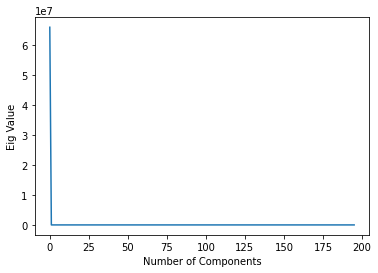

In [9]:

ldt_matrix = np.matmul(LA.pinv(Sw), SB)
alpha = 0.000001
#ldt_matrix = np.matmul(LA.inv(Sw+ alpha*np.identity(len(Sw))), SB)
eigVal, eigVect= LA.eig(ldt_matrix)
eigVal = np.real(eigVal)
eigVect = np.real(eigVect)
plt.plot(eigVal)
plt.ylabel("Eig Value")
plt.xlabel('Number of Components')

Text(0, 0.5, 'Separability Measure')

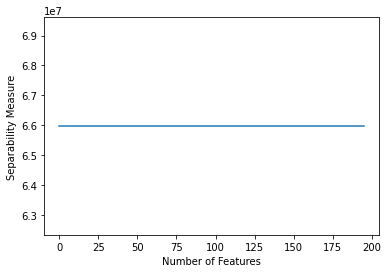

In [10]:
cum_sum_trace = np.cumsum(eigVal)
plt.plot(cum_sum_trace)
plt.xlabel('Number of Features')
plt.ylabel('Separability Measure')

In [11]:
myLabels = np.unique(y_train)
len(myLabels)
W = eigVect[:,0:len(myLabels)-1]
print(W.shape, X_train.shape)
transformed_train = (np.matmul(W.T, X_train.T)).T
transformed_test = (np.matmul(W.T, X_test.T)).T

(196, 9) (4999, 196)


In [12]:
clf = GaussianNB()  
clf.fit(transformed_train, y_train)
y_pred = clf.predict(transformed_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.30532212885154064

In [13]:
clf = GaussianNB()  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5070028011204482

In [14]:
myLabels = np.unique(y_train)
len(myLabels)
W = eigVect[:,0:150]
print(W.shape, X_train.shape)
transformed_train = (np.matmul(W.T, X_train.T)).T
transformed_test = (np.matmul(W.T, X_test.T)).T

clf = GaussianNB()  
clf.fit(transformed_train, y_train)
y_pred = clf.predict(transformed_test)
accuracy_score(y_test, y_pred)

(196, 150) (4999, 196)


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.49939975990396157